**รายชื่อสมาชิกในกลุ่ม** (ดับเบิลคลิกหรือดับเบิลแท็บเซลล์นี้เพื่อกรอกข้อมูล) <br>
<font color='blue'>(พื้นที่สำหรับกรอก) </font><br/>

1. 650710076 ณัฏฐณิชา เวียงวิราศไพศาล
2. 650710592 หฤณชนก พนมวรชัย
3. 650710836 พัชราพร ภายไธสง

เป็นส่วนหนึ่งของวิชา 5177433, Deep Learning For Computer Vision, อ.ดร.ภูริวัจน์ วรวิชัยพัฒน์

## จุดประสงค์การเรียนรู้
ในแบบฝึกหัดนี้ เราจะทดลองใช้ตัวแบบการเรียนรู้เพื่อรู้จำภาพในฐานข้อมูล CIFAR10 และรู้จักกับการรายงานผลการรันออกมาในรูปของกราฟด้วย matplotlib และ plotly ซึ่งจุดเน้นในแบบฝึกหัดนี้จะไม่ใช่การให้ได้มาซึ่งตัวแบบที่ทรงพลัง แต่เป็นการเข้าใจกระบวนการฝึกและทดสอบสมรรถนะขั้นพื้นฐาน

สิ่งที่เราสนใจจะทำให้ได้ในแบบฝึกหัดนี้คือ
1. สร้างและฝึกตัวแบบการเรียนรู้
  * การกำหนดโครงสร้างตัวแบบเชิงลำดับ (sequential) ที่ไม่มี Hidden Layer
  * การคอมไพล์ตัวแบบพร้อมระบุวิธีการฝึกผ่าน Optimizer
  * การทำข้อมูลให้เป็นมาตรฐาน (normalization)
  * ตัวแบบที่มีชั้นซ่อนตัวชนิด dense หนึ่งชั้น
  * หัดใช้ non-linearlity unit คือ ReLU
2. การบันทึกและเรียกใช้ตัวแบบที่ฝึกแล้ว
  * การบันทึตัวแบบที่ฝึกแล้ว
  * การโหลดตัวแบบที่ฝึกมาแล้ว
  * การฝึกตัวแบบหลังจากที่โหลดขึ้นมาใหม่
3. การทดสอบสมรรถนะของตัวแบบ
  * การใช้ test set เมื่อเรียกฟังก์ชัน fit สำหรับฝึกตัวแบบ (validation)
  * การพล็อตกราฟผลลัพธ์ด้วย matplotlib
  * การนำไปใช้กับตัวอย่างและการนำค่าผลลัพธ์การทาย (prediction) มาใช้

## <font color='red'>งานที่ 0</font>: งานเดิม ๆ ที่แสนสบาย, import libs
เราจะเริ่มจากการอิมพอร์ตโมดูลเดิมเข้ามาพร้อมกับโหลดฐานข้อมูล CIFAR10

In [1]:
# [Your Work] Import modules here
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_virtual_device_configuration(gpus[0],
#   [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3096)])


# [Your Work] Load CIFAR10 data into tuples
CIFAR10 = keras.datasets.cifar10
tuples = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = tuples.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255


2024-08-15 10:18:32.362707: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.17.0-dev20240601
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 56s 0us/step


## <font color='red'>งานที่ 1</font>: สร้างและฝึกตัวแบบ
ในงานนี้ เราจะสร้างและฝึกตัวแบบเชิงลำดับ (Sequential) คือข้อมูลจะเดินหน้ากันอย่างเดียว ไม่มีย้อนกลับวนไปมา นอกจากนี้ตัวแบบจะส่งข้อมูลเดินหน้าไปชั้นที่ติดกันเท่านั้นด้วย แน่นอนว่า เราจะเริ่มจากตัวแบบที่มีชั้นซ่อนตัวเพียงหนึ่งชั้นเพื่อทำความคุ้นเคยกับเฟรมเวิร์คการเรียนรู้เชิงลึก TensorFlow และ Keras

### <font color='red'>งานที่ 1.1</font>: การกำหนดโครงสร้างตัวแบบเชิงลำดับ (sequential) ที่ไม่มีชั้นซ่อนตัว
ในตัวแบบโครงข่ายประสาทเทียม สิ่งที่เราต้องมีแน่ ๆ คือชั้นข้อมูลเข้า (input layer) และชั้นผลลัพธ์ (output layer) ส่วนชั้นซ่อนตัว (hidden layer) นั้นจะมีหรือไม่มีก็ได้ ถ้ามีจะมีกี่ชั้นก็ได้และจำนวนโหนดในชั้นซ่อนตัวเราจะกำหนดให้มีปริมาณเท่าใดก็ได้เช่นกัน (ตราบเท่าที่เครื่องของเรารับไหว)

ซึ่งตัวอินพุตเลเยอร์นั้นจะต้องมีขนาดและรูปร่างสอดคล้องกับภาพทุกประการ ซึ่งรวมถึงจำนวนช่องสัญญาณสีด้วย (ในที่นี้คือ CIFAR10 มี 3 สี) ส่วนตัวของเอาต์พุตเลเยอร์นั้นจะมีจำนวนตามประเภท (class) ของสิ่งที่เราต้องการให้เครื่องทาย ซึ่งในที่นี้มีทั้งหมด 10 ประเภท ดังนั้นเอาต์พุตเลเยอร์ของเราจะมี 10 โหนดและโดยปรกติ 10 โหนดนี้จะแทนความน่าจะเป็นเชิงสัมพัทธ์ว่าภาพที่รับเข้ามามีความน่าจะเป็นที่จะอยู่ในแต่ละประเภทเท่าใด

### เรื่องสำคัญ 1.1.a: Flatten สำหรับแปลงข้อมูลสองมิติให้เป็นเวคเตอร์ยาว ๆ
ในตอนนี้เราต้องการเวคเตอร์คุณลักษณะ (feature vector) ที่เก็บค่าพิกเซลสีไว้ ในขณะที่รูปที่รับเข้ามาเป็นภาพสองมิติ ดังนั้นเราอาจจะต้องปรับขนาดมันให้เป็นเวคเตอร์ด้วย Flatten

**หมายเหตุ** ตัว input_shape ของเราที่จริงเป็นสามมิติ เพราะมีเรื่่องของช่องสัญญาณสีมาเกี่ยวข้องด้วย ถ้าเราอยากรู้ว่าตัว input_shape ของเราควรมีค่าเป็นเท่าใด ให้สังเกตจาก train_images.shape ที่เราทำในการบ้านที่แล้ว (อย่าลืมตัดเลข 50,000 ที่แทนจำนวนภาพออกด้วยนะ เพราะโครงข่ายของเราจัดการภาพทีละภาพ ไม่ใช่ทีละ 50,000 ภาพ)

### เรื่องสำคัญ 1.1.b: Dense เป็นเลเยอร์แบบพื้นฐาน ซึ่งนิยมใช้ในชั้นข้อมูลเข้า
นอกจากนี้ชั้นซ่อนตัวจะเป็น Dense ก็ได้ด้วย แต่ก็ขึ้นอยู่กับวิธีการที่เราสนใจจะใช้ ในสาขาด้านการประมวลผลภาพ เรามักจะพบชั้นซ่อนตัวชนิดอื่นบ่อยกว่าชั้น Dense อย่างไรก็ตามในการบ้านนี้ เราจะใช้ Dense ทั้งในชั้นซ่อนตัวและชั้นผลลัพธ์ ทั้งนี้งานที่ 1.1 ยังไม่มีชั้นซ่อนตัว เราจะเชื่อมชั้นข้อมูลเข้ากับชั้นผลลัพธ์โดยตรง (คือเป็นชั้นสองชั้นที่ติดกัน)

### เรื่องสำคัญ 1.1.c: อย่าลืมกำหนด activation function ของชั้น output ให้เป็นแบบ tf.nn.softmax
เนื่องจากงานนี้เป็นการแยกประเภทวัตถุ (classification) การเลือกใช้ activation function เป็นแบบ softmax นับเป็นทางเลือกที่เราควรพิจารณาเป็นทางแรก

In [8]:
# [Your Work] Create a model here
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### <font color='red'>งานที่ 1.2</font>: คอมไพล์โมเดลพร้อมกำหนด Optimizer
ในการทำให้โมเดลอยู่ในสภาพร้อมใช้งาน เราจะต้องคอมไพล์มันก่อน ซึ่งในขั้นตอนนี้เราจะต้องกำหนด Optmizer และเป้าหมายในการวัดสมรรถนะ (loss และ metrics) ในที่นี้เราจะใช้ตัวออปทิไมเซอร์แบบ Adam, ค่า loss แบบ sparse categorial crossentropy (อย่าลืมคำว่า sparse) และ metrics ที่เราจะให้เครื่องรายงานมาคือ accuracy

นอกจากนี้เพื่อให้แน่ใจว่าโครงสร้างของโครงข่ายที่ได้มาสอดคล้องกับความต้องการของเรา เราจะใช้คำสั่ง summary() ตรวจดูโครงสร้างที่ได้มาด้วย (ถ้าโมเดลเราถูกต้อง จำนวนพารามิเตอร์ทั้งหมด (Total params) ควรจะเป็น 30,730 ตัว)

In [11]:
# [Your Work] Compile and config optimizer here
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# [Your Work] Do not forget to check your model via summary()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        30,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

เอาล่ะ มาลองฝึกโมเดลด้วยคำสั่ง fit กัน โดยให้ส่งเฉพาะ train_images และ train_labels ไปฝึก (ไม่ต้องใช้ validation data) ส่วนจำนวน epochs จัดไปที่ 5 รอบก็พอ

In [14]:
# [Your Work] fit a model with train images and labels for 5 epochs
# No need to use test data here. We just need to
hist = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2838 - loss: 2.0364
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3442 - loss: 1.8982
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3582 - loss: 1.8581
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3718 - loss: 1.8349
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3792 - loss: 1.8218


### <font color='red'>งานที่ 1.3</font>: ไขปริศนา ทำไมค่า accuracy มันถึงได้แย่นัก?
นี่ขนาดเป็นผลลัพธ์จากฅข้อมูลฝึก ไม่ใช่ข้อมูลทดสอบ ความแม่นยำยังได้แค่ประมาณ 10% (ค่า acc) ซึ่งเท่ากับการเดาสุ่มมั่ว แบบนี้ต้องมีอะไรผิดพลาดแน่นอน หรือว่าเป็นเพราะตัวแบบเราง่ายเกินไป? ไม่หรอก ต่อให้ตัวแบบง่ายยังไง มันก็น่าจะได้ผลลัพธ์ที่ดีกว่าเดาสุ่ม เพราะเอาเข้าจริง ๆ จำนวนพารามิเตอร์ที่มีอยู่ในตัวแบบก็ใช่ว่าจะน้อยจนหาประโยชน์อะไรไม่ได้

วกกลับไปเนื้อหาที่เราเรียนมาก่อนหน้า จำได้ไหมว่าค่าฟีทเจอร์ต่าง ๆ ควรจะเป็นเลขทิศนิยมอยู่ในช่วง 0 ถึง 1 (หรือ -1 ถึง 1) ซึ่งขั้นตอนนี้เราเรียกว่า feature normalization ยิ่งไปกว่านั้นแท้จริง feature normalization มีหลายชนิดและสามารถทำได้หลายแบบ ไม่เฉพาะการจำกัดค่าในช่วง 0 ถึง 1 แบบนี้เท่านั้น (แต่วิธีนี้ถือว่าง่ายที่สุด)

จงทำการ normalize ค่าข้อมูลในชุดฝึกและทดสอบผ่านการหารด้วยเลข 255.0

In [18]:
#[Your Work] Divde train and test sets with 255.0
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

### <font color='red'>Quick Quiz</font>: ทำไมต้องหารด้วย 255 จงอธิบายเหตุผล
ทำไมเราเลือกหารด้วย 255

 <font color='blue'>(พื้นที่สำหรับเติมคำตอบ) </font><br/>


###  <font color='red'>งานที่ 1.3.2</font>: ลอง fit ตัวแบบกันอีกรอบ
ให้นำโค้ดที่เราใช้ตอน fit ตัวแบบมาใส่ไว้ตรงนี้ พร้อมกับลองรันดูอีกรอบ สังเกตด้วยว่าการ normalize data ส่งผลต่อความแม่นยำที่ได้จริง ดังนั้นถ้าความแม่นยำที่ได้ของเรามันดูแปลก ๆ อย่าลืมตรวจด้วยว่าเรา normalize data อย่างถูกต้องแล้วหรือยัง เช่นเดิม ทำเพียง 5 epochs ก็เพียงพอแล้ว

In [23]:
# [Your Work] fit a model with train images and labels for 5 epochs
# No need to use test data here. We use only train_images and train_labels.

hist = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1221 - loss: 2.3153
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1989 - loss: 2.2940
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2033 - loss: 2.2902
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2319 - loss: 2.2829
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2614 - loss: 2.2688


## <font color='red'>งานที่ 1.4</font>: สร้างชั้นซ่อนตัวแบบ Dense (Hidden  Layer)
ในตัวแบบที่ผ่านมา เราไม่ได้สร้างชั้นซ่อนตัวขึ้นมาเลย ซึ่งโดยปรกติตัวแบบเชิงลึกจะมีชั้นซ่อนตัวอย่างน้อยสองชั้น แต่ในที่นี้เราต้องการสร้างเพียงชั้นเดียวเพื่อศึกษาประโยชน์ของมันก่อน

จงสร้างชั้นซ่อนตัวที่มีโหนดจำนวน 200 โหนด และไม่มีการใช้ activation function ในชั้นซ่อนตัว (ใช้ softmax กับชั้นผลลัพธ์เช่นเดิม)

In [26]:
# [Your Work] Add a hidden layer with 200 nodes, 'no activation function.'

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(200),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])



In [28]:
# [Your Work] พื้นที่สำหรับคอมไพล์และสรุปตัวแบบ (ให้ใช้โค้ดเดิมที่อยู่ข้างบนมาแปะใส่ได้เลย)
# (ถ้าโมเดลเราถูกต้อง จำนวนพารามิเตอร์ทั้งหมด (Total params) ควรจะเป็น 616,610 ตัว)
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 616,610 (2.35 MB)

 Trainable params: 616,610 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# [Your Work] fit a model with train images and labels for 5 epochs
# Like before, no need to use test data here.
hist = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2560 - loss: 2.0627
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3566 - loss: 1.8336
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3769 - loss: 1.7865
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3811 - loss: 1.7709
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3949 - loss: 1.7559


### <font color='red'>Quick Quiz 1.4</font> : ความแม่นยำที่ได้จากโมเดลที่มีชั้นซ่อนตัวเพิ่มขึ้นหรือเปลี่ยนแปลงจากเดิมอย่างไร
เปลี่ยนแปลงจากเดิมอย่างไร ทำไมจึงเป็นเช่นนั้น จงอภิปรายเหตุผลสนับสนุนข้อสังเกตที่พบ (ซึ่งคุณอาจจะอภิปรายได้ดีหากทำแบบฝึกหัดข้อที่อยู่ถัดไป)

 <font color='blue'>ทำให้ accuracy  </font><br/>



### <font color='red'>งานที่ 1.5</font>: ใช้ activation function กับชั้นซ่อนตัว
ในแบบเรียนที่ผ่านมา เรามีการใช้ activation function บ่อย ๆ โดยเฉพาะฟังก์ชัน relu ดังนั้นเราจะเปลี่ยนตัวแบบนี้เพียงอย่างเดียวคือใส่ฟังก์ชัน relu ลงไปในชั้นซ่อนตัวด้วย (จากนั้นก็จะคอมไพล์และสรุปตัวแบบเช่นเดิมและฝึกโมเดลอีกครั้ง)

คำอธิบายเพิ่มเติม: ให้มอง activation fuction นี้เหมือนตัวกรอก เช่น sofmax นั้นเป็นการกรองข้อมูลที่เป็นค่าบวกเท่านั้นที่จะผ่านไปยังเลเยอร์ถัดไป แล้วก่อนหน้านี้ไม่ได้กรองมันเกิดผลกระทบอะไร?

In [35]:
# [Your Work] From the previous hidden layer with 200 nodes,
#   now add tf.nn.relu as an activation function.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [37]:
# [Your Work] พื้นที่สำหรับคอมไพล์และสรุปตัวแบบ (ให้ใช้โค้ดเดิมที่อยู่ข้างบนมาแปะใส่ได้เลย)
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 616,610 (2.35 MB)

 Trainable params: 616,610 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

### <font color='red'>Quick Quiz 1.5a</font>: เมื่อใช้ relu แล้วจำนวนพารามิเตอร์ในตัวแบบต่างไปจากเดิมหรือไม่
จำนวนพารามิเตอร์ของตัวแบบเปลี่ยนไปจากเดิมหรือไม่ ทำไมจึงเป็นเช่นนั้น จงอภิปรายเหตุผลสนับสนุนข้อสังเกตที่พบ

<font color='blue'>(พื้นที่สำหรับกรอก) </font><br/>


In [41]:
# [Your Work] fit a model with train images and labels for 5 epochs
# Like before, no need to use test data here.
hist = model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2261 - loss: 2.1189
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3332 - loss: 1.8805
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3568 - loss: 1.8163
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3782 - loss: 1.7562
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3914 - loss: 1.7208


### <font color='red'>Quick Quiz 1.5b</font>: การใช้ relu ทำให้ความแม่นยำเปลี่ยนไปประมาณกี่เปอร์เซ็นต์

# <font color='blue'>7% </font><br/>

## <font color='red'>งานที่ 2</font>: บันทึกและเรียกใช้ตัวแบบที่ผ่านการฝึกมาแล้ว
ในงานที่ 1 เราฝึกโมเดลไปเพียง 5 รอบ และแต่ละรอบมีแนวโน้มว่าจะใช้เวลาไม่มากเพราะปริมาณข้อมูลไม่มากและตัวแบบเราไม่ซับซ้อน แต่ในการประยุกต์ใช้ในระยะหลังทั้งปริมาณข้อมูลและความซับซ้อนของตัวแบบนั้นถือว่าสูงมาก เช่น ImageNet มีภาพกว่า 14 ล้านภาพ และตัวแบบอย่าง ResNet มีชั้นซ่อนตัวหลายสิบหรือเกิน 100 ชั้น ทำให้การฝึกกินระยะเวลานานมาก ในบางงานวิจัยมีรายงานว่าฝึกตัวแบบกับชุดข้อมูล ImageNet กว่า 3 สัปดาห์

เมื่อเป็นเช่นนี้ เราจึงจำเป็นที่จะต้องบันทึกตัวแบบไว้เป็นระยะในระหว่างการฝึก เพื่อให้สามารถนำตัวแบบไปฝึกต่อหรือนำตัวแบบไปให้ผู้ใช้โดยไม่ต้องฝึกซ้ำ ซึ่ง Keras สามารถบันทึกตัวแบบที่ฝึกแล้วได้โดยสะดวก โดยจะบันทึกในรูปแบบ HDF5

สำหรับใครที่ยังไม่ได้ลง library: pip install pyyaml h5py <br>
เมื่อลงเสร็จทำการ refresh หนึ่งที

In [63]:
!pip install pyyaml h5py


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


### <font color='red'>งานที่ 2.1</font>: การบันทึกตัวแบบที่ฝึกแล้ว
ตัวแบบทุกตัวของ Keras เป็นวัตถุที่มีฟังก์ชัน save ติดตัว เราสามารถระบุพาธและชื่อไฟล์ที่ต้องการเซฟได้เลย
จงเรียกใช้ฟังก์ชัน save ของตัวแบบลงในไฟล์ที่ชื่อว่า trained_model.hdf5 ถ้าคุณสงสัยว่าจะเขียนโปรแกรมอย่างไรให้อ่านข้อมูลเพิ่มเติมได้ที่[ลิงค์นี้](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model)

In [92]:
# [Your Work] Save a trained model to file trained_model.hdf5
model.save('trained_model.keras')

#### ข้อความเตือนที่เกิดขึ้น
ถ้าหากเราใช้ Optimizer จาก tf.train.AdamOptimizer() แทนที่จะเป็น keras.optimizers.Adam เราจะเจอข้อความเตือนแบบยาวเหยียด ดังนั้นถ้าเป็นไปได้ ให้ใช้ Optimizer ของตัว Keras เองจะดีที่สุด เพราะมันจะมีข้อมูลการฝึกบางอย่างที่หายไปและเราต้องเสียเวลาคอมไพล์ตัวแบบใหม่ อย่างไรก็ตามในกรณีตัวแบบที่แสนเรียบง่ายนี้ เราจะยังไม่ได้รับผลกระทบใด ๆ และเรายังไม่ต้องกังวลกับประเด็นนี้

### <font color='red'>งานที่ 2.2</font>: การโหลดตัวแบบที่บันทึกไว้ก่อนหน้า
เราสามารถโหลดตัวแบบที่บันทึกไว้ได้โดยฟังก์ชัน load_model ซึ่งอยู่ใน keras.models (พูดง่าย ๆ ก็คือ เราจะเขียนโค้ดว่า keras.models.load_model หรืออะไรทำนองนี้) ให้ศึกษาข้อมูลจากลิงค์ที่ให้มาก่อนหน้าและโหลดตัวแบบที่บันทึกไว้ ซึ่งการโหลดนี้ให้โหลดไว้ในตัวแปรที่ชื่อ **<font color="blue"> model2 (อย่าบันทึกทับตัวเดิม) </font>**

In [97]:
# [Your Work] load a saved model to variable model2
# model2 =
from keras.layers import Activation

# กำหนดฟังก์ชันการทำงานให้กับ 'softmax_v2' ก่อนการโหลดโมเดล
def softmax_v2(x):
    return Activation('softmax')(x)
keras.utils.get_custom_objects().update({'softmax_v2': softmax_v2})

model2 = keras.models.load_model('trained_model.keras')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:690: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


#### ถ้าพบ WARNING ตอนโหลด
หากพบคำเตือนว่า 'WARNING:tensorflow:No training configuration found in save file: the model was *not* compiled. Compile it manually.' แสดงว่าตัวแบบเราใช้ Optimizer จาก tensorflow ไม่ได้มาจาก Keras ในกรณีเช่นนั้เราต้องสั่งคอมไพล์ตัวแบบใหม่อีกรอบ

### <font color='red'>งานที่ 2.2.extra</font>: คอมไพล์ model2 ซ้ำ (ถ้าจำเป็น)
ในกรณีที่คุณได้รับ WARNING ในตอนบันทึกและโหลดตัวแบบ ขอให้ทำการคอมไพล์ตัวแบบด้วยวิธีการเดิมที่ทำมาก่อนหน้าอีกครั้ง และอย่าลืมว่า **เราต้องคอมไพล์ model2 ไม่ใช่ model อันแรก**

In [99]:
# [ํYour Extra Work] Re-compile model2 with the same settings with the prior model.



model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,233,222 (4.70 MB)

 Trainable params: 616,610 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 616,612 (2.35 MB)

### <font color='red'>งานที่ 2.3</font>: การฝึกตัวแบบหลังจากที่โหลดขึ้นมาใหม่
ตัวแบบที่เราโหลดขึ้นมาแล้วสามารถนำมาฝึกต่อได้ ซึ่งในที่นี้เราจะรันฟังก์ชัน fit กับ model2 อีก 5 รอบและสังเกตค่าความแม่นยำที่ได้

จังหวะนี้เป็นการนำ pre-trained model มา train เพิ่มอีกรอบ ในอณาคตจะได้ยินคำนี้บ่อยๆเพราะว่าโมเดลบางตัวมันลึกมากๆเราคงไม่นำมาเทรนใหม่อีกรอบหรอก ในบางกรณีโหลดโมเดลเขามาใช้งานเลยก็มี

In [109]:
# [Your Work] ฝึกตัวแบบ model2 อีกห้ารอบ
hist = model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4528 - loss: 1.5486
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4584 - loss: 1.5384
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4618 - loss: 1.5304
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4629 - loss: 1.5158
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4686 - loss: 1.5163


### <font color='red'>Quick Quiz</font>: ความแม่นยำของตัวแบบที่นำมาฝึกต่อแตกต่างจากก่อนหน้าหรือไม่
ขอให้สังเกตค่าความแม่นยำที่เกิดขึ้นในรอบการฝึกทั้งห้าหลังนำมาฝึกต่อ คุณสังเกตเห็นว่าค่า loss และ accuracy ของการฝึกห้ารอบใน model2 กับการฝึกห้ารอบใน model แรกมีความแตกต่างกันอย่างไร

 <font color='blue'>(พื้นที่สำหรับเติมคำตอบเกี่ยวกับข้อสังเกตที่พบในการฝึกทั้งสองครั้ง)</font><br/>

## <font color='red'>งานที่ 3</font>: การทดสอบสมรรถนะของตัวแบบ
เนื่องจากการที่เครื่องเห็นข้อมูลฝึกบ่อย ๆ อาจจะทำให้เกิดเหตุการณ์โอเวอร์ฟิตติ้ง (Overfitting) ซึ่งเปรียบเหมือนกับนักเรียนที่ท่องจำคำตอบของข้อสอบเก่าได้โดยไม่เข้าใจ ดังนั้นการทดสอบที่ดีจะต้องทำด้วยข้อมูลที่เครื่องไม่เคยเห็นมาก่อน ซึ่งในที่นี้ก็คือ test images/labels ที่มีอยู่ในฐานข้อมูล CIFAR10 นี่เอง

### <font color='red'>งานที่ 3.1</font>: การใช้ test set เมื่อเรียกฟังก์ชัน fit สำหรับฝึกตัวแบบ
มีความแตกต่างจากการฝึกแบบที่ทำในข้อก่อนหน้าเพียงอย่างเดียวคือ เราเพียงเพิ่มพารามิเตอร์เข้าไป โดยการส่งชุดข้อมูลทดสอบเข้าไปด้วยตอนฝึกเท่านั้น อย่างไรก็ตามเพื่อให้เก็บผลการฝึก(ประวัติ)ไว้อ้างอิงต่อไปในอนาคตได้ เราจะทำการเก็บผลการฝึกไว้ในตัวแปรชื่อ h ด้วย (พูดง่าย ๆ ก็คือให้เขียนว่า h = model.fit(....) อะไรทำนองนี้)

จงทำการฝึกตัวแบบต่อจาก model2 ที่ฝึกไว้ก่อนหน้า โดยฝึกอีก 10 รอบ และมีการใช้ข้อมูลชุดทดสอบเพื่อประเมินผลการฝึกและเก็บประวัติการฝึกไว้ในตัวแปร h ซึ่งโดยปรกติเราส่งไปภายใต้ชื่อพารามิเตอร์ validation_data <br/>
**หมายเหตุ** ถ้าเราทำการทดลองไปแล้วจะรันอีก ผลการฝึกมันจะดูเหมือนต่อเนื่องไปเรื่อย ๆ ถ้าอยากกลับมาเริ่มที่จุดเดิม เราสั่งโหลดตัวฝึกขึ้นมาอีกรอบได้ (ในกรณีตัวอย่างนี้ เราบันทึกตัวฝึกไว้หลังจบ 5 รอบ เราก็จะวกกลับไปหลังที่ตัวฝึกถูกฝึกผ่านไปแล้ว 5 รอบ นั่นเอง)

In [118]:
# [Your Work] ฝึกตัวแบบ model2 อีก '10 รอบ' พร้อมส่งข้อมูลฝึกและบันทึกฝลการฝึกไว้ด้วย
hist = model.fit(train_images, train_labels, batch_size=256, 
                 validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4104 - loss: 1.6774 - val_accuracy: 0.4116 - val_loss: 1.6736
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4105 - loss: 1.6762 - val_accuracy: 0.4124 - val_loss: 1.6686
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4142 - loss: 1.6687 - val_accuracy: 0.4148 - val_loss: 1.6637
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4153 - loss: 1.6628 - val_accuracy: 0.4141 - val_loss: 1.6595
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4139 - loss: 1.6575 - val_accuracy: 0.4154 - val_loss: 1.6595
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4151 - loss: 1.6579 - val_accuracy: 0.4223 - val_loss: 1.6487
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4214 - loss: 1.6448 - val_accuracy: 0.4208 - val_loss: 1.6423
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4229 - loss: 1.6479 - val_accuracy: 0

### <font color='red'>งานที่ 3.2</font>: การพล็อตกราฟผลลัพธ์ด้วย matplotlib
ณ เวลานี้ ค่าตัวเลขที่เราต้องคอยสังเกตมีมากขึ้น เชน ค่า loss ของการฝึกและการทดสอบ รวมถึงค่าความแม่นยำของการฝึกและการทดสอบ มองผิวเผินเหมือนกับมีเพียง 4 ค่า แต่ที่จริงมันมีจำนวนที่เพิ่มขึ้นตามรอบการฝึกด้วย อย่างข้างบนนี้เราฝึก 10 รอบ ก็จะมีตัวเลขที่เราต้องคอยติดตามสังเกตการเปลี่ยนแปลงรวมแล้ว 40 ค่า

อย่างไรก็ตาม สิ่งที่เราสนใจมากที่สุดก็คือแนวโน้มของการเปลี่ยนแปลงเมื่อฝึกไปแต่ละรอบ และความแตกต่างระหว่างการฝึกกับการทดสอบ เราอาจจะลดความลำบากของการจดจำตัวเลขได้ด้วยการวาดกราฟค่าผลลัพธ์ในแต่ละรอบออกมา โดยวาดทั้งที่เป็นตัวเลขจากการฝึกและการทดสอบคู่กันไป เป็นต้นว่า (1) เราจะวาดเส้นค่า loss ของการฝึกคู่กับค่า loss ของการทดสอบ หรือ (2) เราจะวาดเส้นค่าความแม่นยำของการฝึกคู่กับค่าความแม่นยำของการทดสอบ

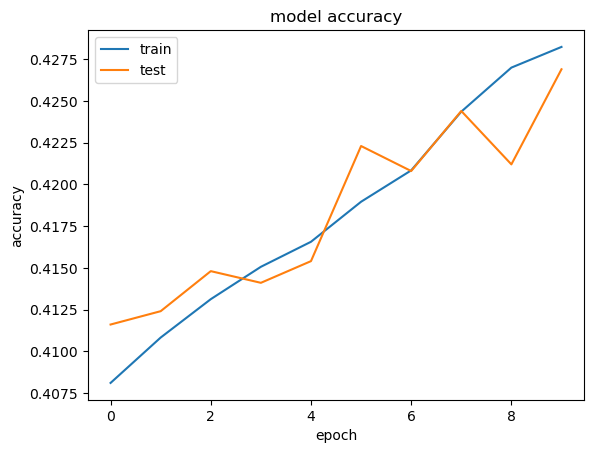

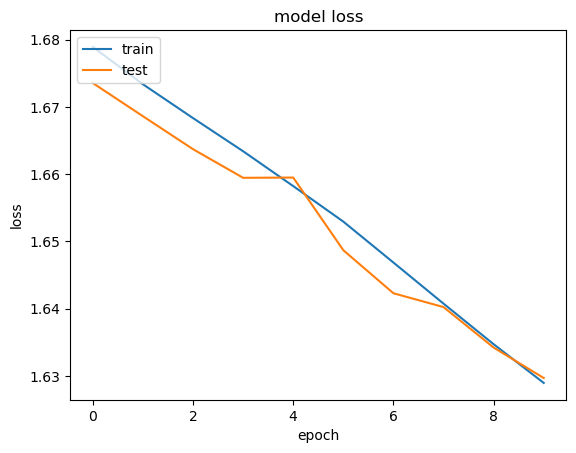

In [124]:
# [Your Work] plot accuracy history of both training and test sets.

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# # [Your Work] plot loss history of both training and test sets.

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






### <font color='red'>Quick Quiz 3.2a</font>: จะดีกว่าไหมถ้าเราวาดกราฟทั้ง 4 เส้นลงไปด้วยกันหมด
ที่จริงก็เป็นไปได้ที่จะทำอย่างนั้น แต่มันจะมีปัญหาอะไรบางอย่างตามมา ขอให้ผู้เรียนลองทดลองในเซลล์ด้านล่างแล้วอภิปรายว่าปัญหาจากการวาดเส้นทั้ง 4 ลงไปด้วยกันในกราฟเดียวคืออะไร

ก่อนหน้านี้เราพล็อตกันสองเส้นอยู่แล้วก็คือชุด hist["accury"] กับ hist["val_accuracy"] แล้วถ้าอยากเพิ่มอีกสองเส้นต้องทำอย่างไร?หละ

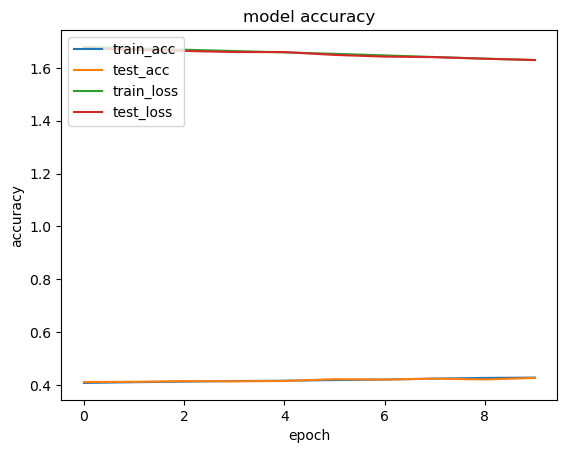

In [130]:
# [Your Work] วาดกราฟทั้ง 4 เส้นลงไปด้วยกันเป็นภาพเดียว (สั่ง plot สี่ครั้งต่อการ show ครั้งเดียว)
# อย่าลืมเปลี่ยน legend ที่เคยมีแต่ train, test ให้เป็นชื่อ 4 อย่างที่เหมาะสมด้วยนะ พยายามหน่อย

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'test_acc','train_loss', 'test_loss'], loc='upper left')
plt.show()





 <font color='blue'>(พื้นที่สำหรับเติมคำอภิปรายปัญหา ขอให้ตอบสิ่งที่เห็นว่าเป็นประเด็นปัญหาที่สำคัญหรือเรารู้สึกอย่างไรเมื่อเทียบกับการพล็อตแบบแยกออกมาสองชุด)</font><br/>



### Tip of Python Life: บรรเทาปัญหา
การพล็อตกราฟสองชุดในภาพเดียวกัน มีปัญหาตามที่สังเกตเห็นได้จากข้างบน หากเราจำเป็นต้องวาดทั้ง 4 กราฟด้วยกันจริง เราสามารถบรรเทาอาการด้วยโค้ดข้างล่างนี้
[ลิงค์ของโค้ดต้นฉบับที่ผมไปดัดแปลงมา](https://matplotlib.org/gallery/api/two_scales.html)

***<font color="blue">แต่เหมือนมันจะมีบัคนิดหน่อยลองแก้ดูว่าต้องแก้ตรงไหนถึงจะทำงานได้ เหมือน key ของตัวแปร h.history จะไม่ตรง</font>***

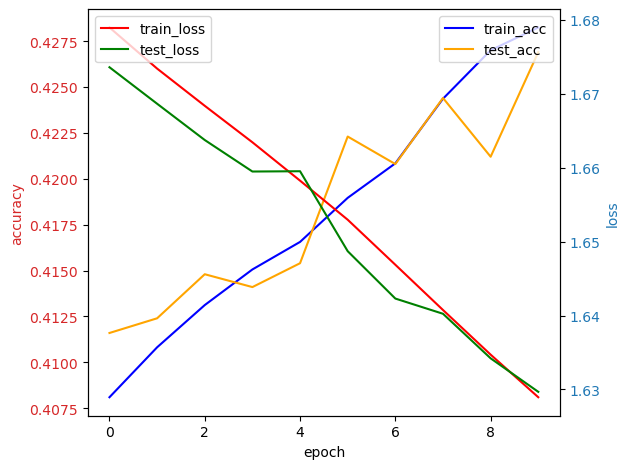

In [152]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy', color=color)
ax1.plot(hist.history['accuracy'], color='blue')
ax1.plot(hist.history['val_accuracy'], color='orange')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(['train_acc', 'test_acc'], loc='upper right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('loss', color=color)  # we already handled the x-label with ax1
ax2.plot(hist.history['loss'], color='red')
ax2.plot(hist.history['val_loss'], color='green')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

### <font color='red'>Quick Quiz 3.2b</font>: ภาพรวมของการแก้ปัญหาในการวาดเส้นกราฟ
ขอให้ลองสังเกตว่าทำไมกราฟถึงดูดีขึ้น และเราจะอ่านค่ากราฟต่าง ๆ ได้อย่างไร จากนั้นลองสรุปออกมาเป็นคำพูดที่เข้าใจได้ง่ายว่าแนวคิดที่ใช้ในการแก้ปัญหาในการวาดกราฟคืออะไร

<font color='blue'>(พื้นที่สำหรับอธิบายแนวคิดของการแก้ปัญหาการวาดกราฟ)</font><br/>

### <font color='red'>งานที่ 3.3</font>: การนำไปใช้กับตัวอย่างและการนำค่าผลลัพธ์การทาย (prediction) มาใช้
แม้ว่าเราจะฝึกตัวแบบมาอย่างดี แต่ตัวแบบที่เราฝึกเสร็จแล้วจะทำประโยชน์ให้เราได้หากเราไม่รู้ว่ามันทายผลอะไรมาให้เรา ในงานนี้เราจะต้องผสมสิ่งที่เราเรียนรู้มาจากการบ้านที่แล้วกับสิ่งที่เรียนมาจากโค้ดในชั้นเรียนสัปดาห์ที่สอง (Keras Easy Model) เพื่อแปลงผลการทายจากเครื่องออกมาให้เป็นข้อความที่เข้าใจตามได้ง่าย เช่น frog, cat, dog ไม่ใช่ตัวเลข และจะต้องรู้ให้ได้ว่า เครื่องทายถูกหรือผิด

เพื่อที่จะทำให้ผู้เรียนเข้าใจตามได้ง่าย เราจะแบ่งแยกงานออกเป็นส่วนเล็ก ๆ

### งานที่ 3.3.1: ใช้ฟังก์ชัน predict กับภาพทั้งชุด
จงเรียกใช้ฟังก์ชัน predict จาก model2 เพื่อทายภาพในชุดทดสอบ (test_images) ทั้งหมดและเก็บผลการทำนายไว้ตัวแปรชื่อ  ***<font color='red'>p</font><br/>***

In [154]:
# [Your Work] use a model to predict the entire set of test images, keep results to p
p = model2.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### <font color='red'>งานที่ 3.3.2</font>: ผลการทายของภาพแรก
ผลการทายของภาพแรกแบบอ่านยาก สามารถดูได้จากค่าใน p[0] ลองรันโค้ดข้างล่างนี้เพื่อดูผลลัพธ์

In [156]:
p[0]

array([0.00857578, 0.03093821, 0.11156344, 0.3793911 , 0.03824542,
       0.19541873, 0.14940491, 0.00394395, 0.08106774, 0.00145063],
      dtype=float32)

### <font color='red'>Quick Quiz 3.3a</font>: จากผลลัพธ์ทางด้านบน เราสรุปได้ว่าเครื่องทายว่าเป็นคลาสไหน และเรารู้ได้อย่างไร
จงตอบคำถามนี้ในเซลล์ทางด้านล่างอย่างละเอียด

<font color='blue'>(พื้นที่สำหรับตอบคำถาม)</font><br/>

### <font color='red'>งานที่ 3.3.3</font>: ผลการทายของภาพแรกแบบใช้เครื่องสกัดออกมา
เมื่อสักครู่ เราดูผลการทายจากการอ่านค่าออกมาด้วยตัวเรา แต่เราตัองทำให้เครื่องมันตอบออกมาให้ได้ว่าเป็นช่องอาเรย์หมายเลขเท่าใดที่เป็นคำตอบที่เครื่องทาย ซึ่งทำได้โดยใช้คำสั่ง np.argmax

จง import โมดูล numpy เข้ามาในชื่อ np และใช้คำสั่ง argmax เพื่อดูว่าเครื่องทายตัวอย่างแรกว่าเป็นคลาสหมายเลขเท่าใด

In [158]:
# [Your Work] import the numpy module
import numpy as np

In [160]:
# [Your Work] use numpy to extract class prediction
np.argmax(p)

36500

### <font color='red'>งานที่ 3.3.4</font>: แปลงผลการทายให้เป็นชื่อคลาสภาษาอังกฤษ
ในการบ้านที่แล้ว เรามีการสร้างลิสต์ชื่อ names ที่เก็บชื่อคลาสแบบภาษาอังกฤษไว้ ซึ่งเราสามารถนำเลขคลาสไปใช้เป็นอินเด็กซ์เพื่อให้ได้ชื่อภาษาอังกฤษออกมา เราจะทำแบบเดียวกันนี้เพื่อให้รู้ว่าเครื่องทายภาพว่าเป็นอะไรแบบที่เข้าใจง่าย ๆ

In [169]:
# [Your Work] จงสร้างลิสต์ names ที่บรรจุชื่อคลาสของวัตถุที่จะทายออกมา
names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

In [177]:
# [Your Work] use value from p[0] and np.argmax to get predicted class name.
predicted_class = np.argmax(p[0])
names[predicted_class]

'cat'

### <font color='red'>งานที่ 3.3.5</font>: ผลการทาย 10 ภาพแรก
ให้ใช้ลูปพิมพ์ผลการทาย 10 ภาพแรกออกมา

In [207]:
# [Your Work] Use a loop to print out predicted class names of the first 10 images.

for i in range(10):
    predicted_index = np.argmax(p[i])
    predicted_class = names[predicted_index]
    print(predicted_class)

cat
truck
ship
ship
deer
frog
cat
frog
deer
automobile


### <font color='red'>งานที่ 3.3.6</font>: คำตอบที่แท้จริงของ 10 ภาพแรก
จากการบ้านที่แล้ว เรารู้ว่าคำตอบอยู่ใน labels ซึ่งในที่นี้คือ test_labels
จงใช้ลูปเพื่อพิมพ์คำตอบที่แท้จริงของ 10 ภาพแรกออกมา

In [236]:
# [Your Work] Use a loop to print out ground-truth class names of the first 10 images.

for i in range(10):
    predicted_index = train_labels[i][0]
    print(names[predicted_index])

frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat


### <font color='red'>งานที่ 3.3.7</font>: เขียนโปรแกรมสรุปให้หน่อยว่าเครื่องทายว่าเป็นอะไรและความจริงคืออะไร พร้อมทั้งสรุปด้วยว่าทายถูกกี่ครั้งจาก 10 ภาพแรกนี้
ตามนั้น อยากให้เครื่องรายงานในรูปแบบทำนองนี้ <br/>
image 1: predict = frog, truth = cat, WRONG <br/>
image 2: predict = ship, truth = ship, CORRECT <br/>
... <br/>
image 10: ....

**คำแนะนำ** ตอนจะตรวจว่าตอบถูกหรือผิดนั้น เราไม่ต้องเอาสตริงข้อความไปเทียบกันก็ได้ เทียบเฉพาะเลขที่ได้มาจาก argmax และ labels ก็พอ ถ้าจะเทียบสตริง ถึงผลลัพธ์จะไม่เพี้ยน แต่การคำนวณจะใช้เวลามากขึ้น ถ้าเลี่ยงได้ควรเลี่ยง

In [282]:
# [Your Work] loop over predictions and labels to check answer

for i in range(10):
    a = names[train_labels[i][0]]
    b = names[np.argmax(p[i])]

    if a==b:
        print("image", i+1 , ": predict =", a , ", truth =", b, "CORRECT")
    else:
        print("image", i+1 , ": predict =", a , ", truth =", b, "WRONG")


image 1 : predict = frog , truth = cat WRONG
image 2 : predict = truck , truth = truck CORRECT
image 3 : predict = truck , truth = ship WRONG
image 4 : predict = deer , truth = ship WRONG
image 5 : predict = automobile , truth = deer WRONG
image 6 : predict = automobile , truth = frog WRONG
image 7 : predict = bird , truth = cat WRONG
image 8 : predict = horse , truth = frog WRONG
image 9 : predict = ship , truth = deer WRONG
image 10 : predict = cat , truth = automobile WRONG


### <font color='red'>งานที่ 3.3.8</font>: แก้ลูปใหม่ ให้มันนับจำนวนคำตอบที่ถูกได้ด้วย
อยากให้เครื่องรายงานในรูปแบบคล้ายเดิม แต่มีบรรทัดสรุปจำนวนคำตอบที่ถูกด้วย <br/>
image 1: predict = frog, truth = cat, WRONG <br/>
image 2: predict = ship, trugth = ship, CORRECT <br/>
... <br/>
#correct answers = 4 <br/>

In [288]:
# [Your Work] add a counter for correct answers

count = 0

for i in range(10):
    a = names[train_labels[i][0]]
    b = names[np.argmax(p[i])]
    if a==b:
        print("image", i+1 , ": predict =", a , ", truth =", b, "CORRECT")
        count+=1
    else:
        print("image", i+1 , ": predict =", a , ", truth =", b, "WRONG")
        
print("correct answers =", count)








image 1 : predict = frog , truth = cat WRONG
image 2 : predict = truck , truth = truck CORRECT
image 3 : predict = truck , truth = ship WRONG
image 4 : predict = deer , truth = ship WRONG
image 5 : predict = automobile , truth = deer WRONG
image 6 : predict = automobile , truth = frog WRONG
image 7 : predict = bird , truth = cat WRONG
image 8 : predict = horse , truth = frog WRONG
image 9 : predict = ship , truth = deer WRONG
image 10 : predict = cat , truth = automobile WRONG
correct answers = 1


### <font color='red'>งานเสริมที่ 1</font>: CNN โมเดล
เนื่องจากได้เรียน CNN ไปแล้วอยากให้นักศึกษาลองปรับโมเดลที่เขียนมาข้างต้นให้ใช้โครงสร้างของ CNN ในการทำนายประเภท <br>
ลองสร้างโมเดลให้มี CNN เป็นพื้นฐาน อยากทราบว่าโมเดลที่เขียนมาปัจจุบันกับโมเดล CNN นั้นประสิทธิภาพการทำงานมันจะต่างกันมากน้อยเพียงใด จงเขียนโมเดลในรูปแบบ sequential เหมือนเดิมแต่ใช้ Conv2D แทนเลเยอร์ input

layers:
- Conv2D
- dense

พร้อมทั้ง train และ predict ด้วย

In [352]:
# [Your Work] model with CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3),activation=tf.nn.relu, padding='same',input_shape=(32, 32, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=256, 
            validation_data=(test_images, test_labels), epochs=5)

model.predict(test_images)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.1925 - loss: 2.2271 - val_accuracy: 0.2994 - val_loss: 2.0297
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.3026 - loss: 1.9990 - val_accuracy: 0.3255 - val_loss: 1.9279
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.3371 - loss: 1.9122 - val_accuracy: 0.3400 - val_loss: 1.8957
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.3602 - loss: 1.8616 - val_accuracy: 0.3724 - val_loss: 1.8237
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.3761 - loss: 1.8181 - val_accuracy: 0.3679 - val_loss: 1.8205
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0.08308488, 0.10201596, 0.15043364, ..., 0.01793271, 0.12907694,
        0.01389584],
       [0.08820461, 0.1789169 , 0.00518136, ..., 0.00261043, 0.34988442,
        0.36305106],
       [0.14619978, 0.07100271, 0.01013332, ..., 0.00494882, 0.6171719 ,
        0.12912616],
       ...,
       [0.0314736 , 0.0279626 , 0.06417336, ..., 0.12867734, 0.01550237,
        0.01802395],
       [0.04794173, 0.15265158, 0.05453176, ..., 0.0563425 , 0.08227444,
        0.10315101],
       [0.06650029, 0.04346397, 0.10081577, ..., 0.39074078, 0.05008443,
        0.04381543]], dtype=float32)

### <font color='red'>งานเสริมที่ 1.1</font>: CNN โมเดล
อยากทราบถึงเหตุเบื้องลึกเบื้องหลังว่ามันทำงานได้ดีกว่าเพราะอะไร เอาทฤษฏีการมองของมนุษย์หรือfilter มาอธิบายก็ได้

 <font color='blue'>(พื้นที่สำหรับเติมคำอภิปราย อยากทราบว่าเมื่อใช้ CNN แล้วดีขึ้นหรือไม่ แล้วดีขึ้นเพราะอะไร?)</font><br/>